<a href="https://colab.research.google.com/github/lromeror/DataVisualization/blob/main/Visualizaciones%20Univariables/visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [86]:
df=pd.read_csv('https://raw.githubusercontent.com/lromeror/DataVisualization/main/Visualizaciones%20Univariables/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
cantPasajero=df.groupby('Sex').agg({'PassengerId':'count'})
cantPasajero

,PassengerId
Sex,
female,314
male,577


##Graficos de Barra

<Axes: title={'center': 'Cantidad de Genero'}, xlabel='Sex'>

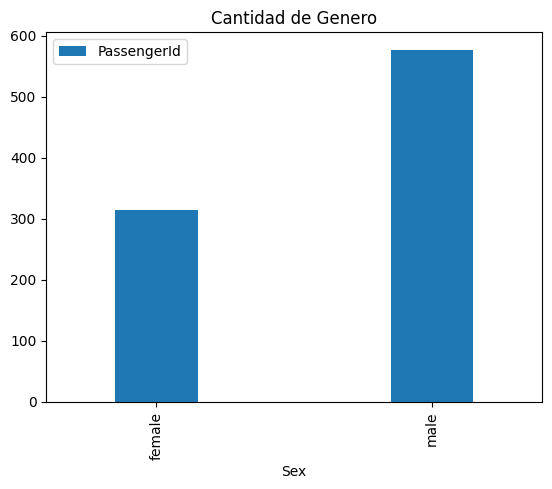

In [88]:
cantPasajero.plot.bar(y="PassengerId",width=0.3,title="Cantidad de Genero")

<Axes: xlabel='Sex', ylabel='PassengerId'>

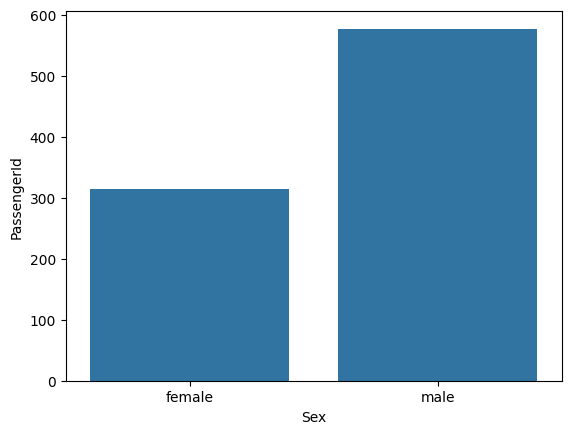

In [89]:
sns.barplot(x='Sex',y='PassengerId',data=cantPasajero)

## Grafico Pie

- Partes porcentuales de un todo
- No poner demasiadas categorias
- Mejor de Proporcion con el de magnitud
- No comparar con otr pieChar

In [90]:
cantPasajero

,PassengerId
Sex,
female,314
male,577


<Axes: title={'center': 'Cantidad de Genero'}, ylabel='PassengerId'>

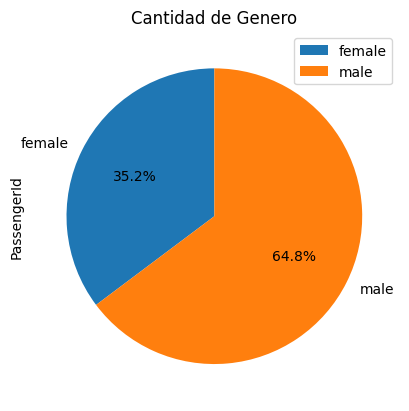

In [91]:
cantPasajero.plot.pie(y="PassengerId",autopct='%1.1f%%',title="Cantidad de Genero",startangle=90)


In [92]:
cantPasajero=cantPasajero.reset_index()

In [93]:
fig=px.pie(cantPasajero,values='PassengerId',names="Sex",title="Cantidad de Genero")
fig.show()

In [94]:
fig=px.pie(cantPasajero,values='PassengerId',names="Sex",title="Cantidad de Genero",hole=0.5)
fig.show()

##Diagrama de cajas

In [95]:
df=df.dropna(subset=['Age'],axis='index')

<Axes: title={'center': 'Age'}, xlabel='Sex'>

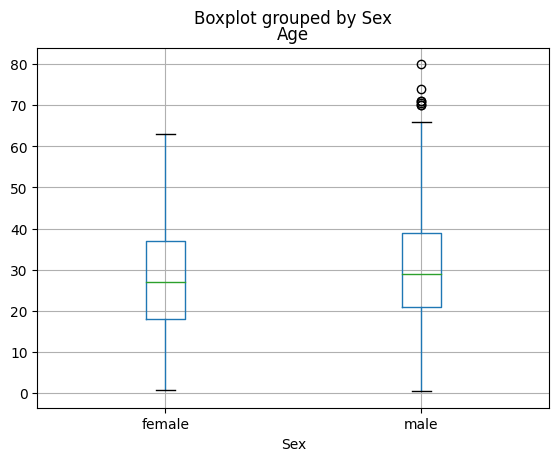

In [96]:
df.boxplot(column='Age',by='Sex')

<Axes: xlabel='Sex', ylabel='Age'>

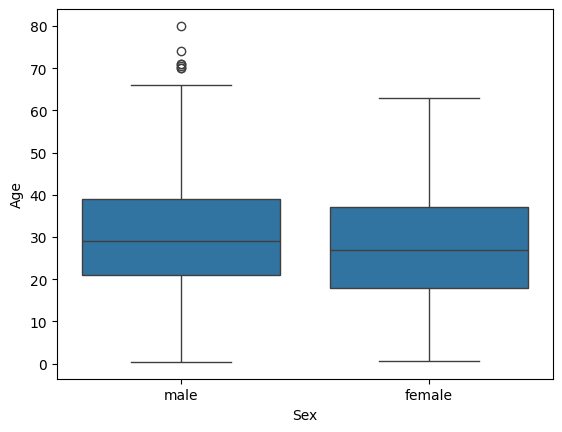

In [97]:
sns.boxplot(x='Sex',y='Age',data=df)

##Grafico de Violines

<Axes: xlabel='Sex', ylabel='Age'>

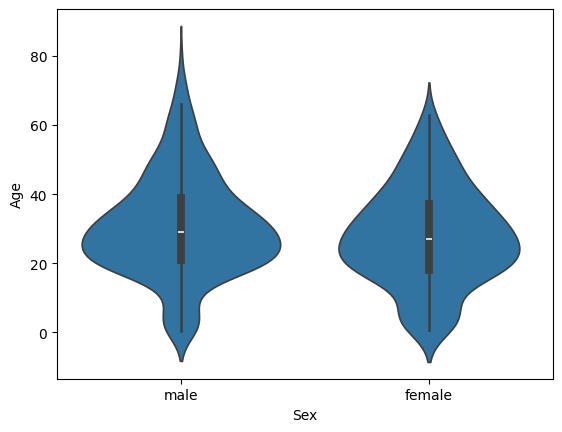

In [98]:
sns.violinplot(x='Sex',y='Age',data=df)

<Axes: xlabel='Sex', ylabel='Age'>

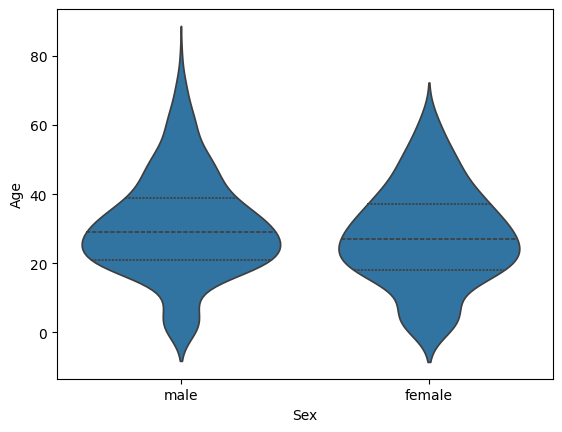

In [99]:
sns.violinplot(x='Sex',y='Age',data=df,inner='quartile')

##Histograma

- Forma de distribucion

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

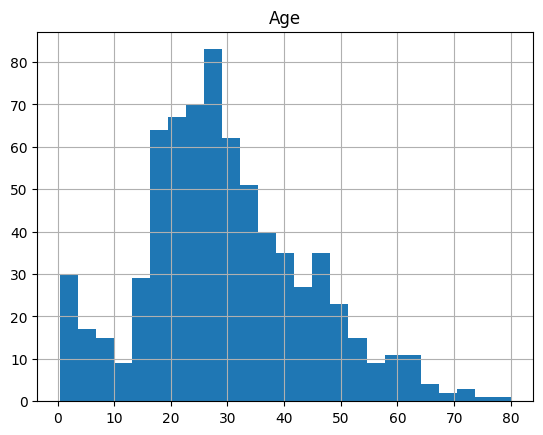

In [100]:
df.hist(column='Age',bins=25)

array([<Axes: title={'center': 'female'}>,
       <Axes: title={'center': 'male'}>], dtype=object)

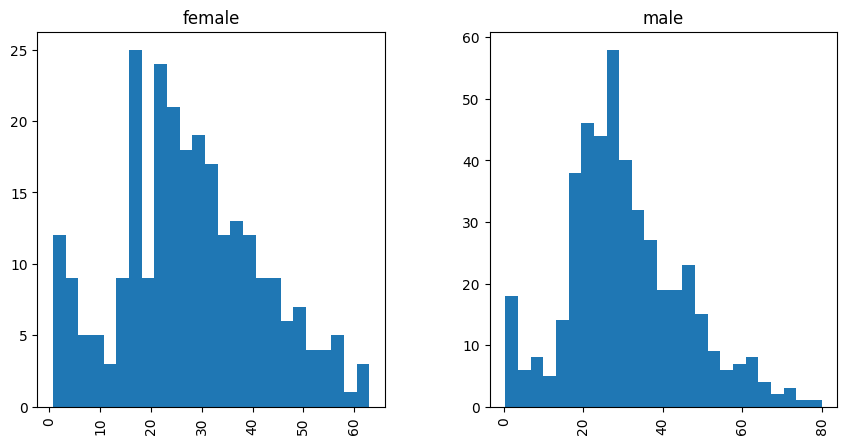

In [101]:
df.hist(column='Age',by='Sex',bins=25,figsize=(10,5))

Histograma con KDE

<Axes: xlabel='Age', ylabel='Probability'>

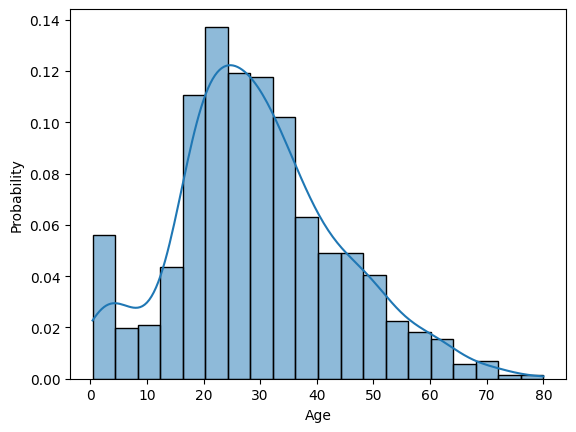

In [102]:
sns.histplot(x='Age',data=df,kde=True,stat='probability',bins=20)

<Axes: xlabel='Age', ylabel='Probability'>

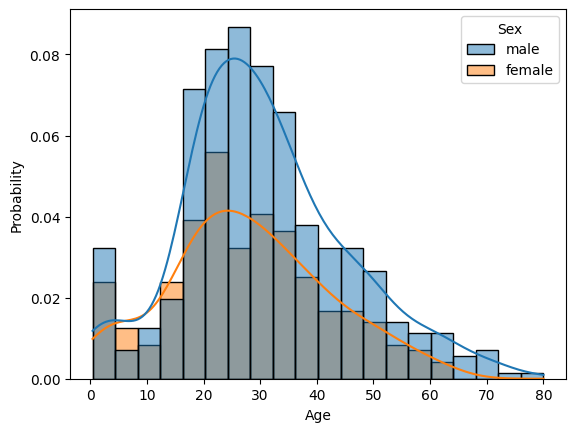

In [103]:
sns.histplot(x='Age',data=df,kde=True,stat='probability',hue='Sex')

##Ojiva

<Axes: xlabel='Age', ylabel='Probability'>

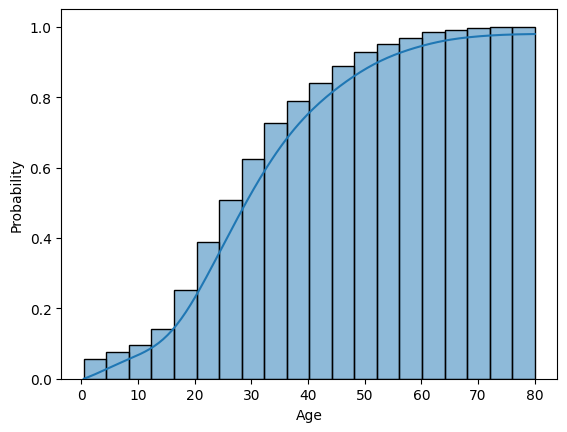

In [104]:
sns.histplot(x='Age',data=df,kde=True,stat='probability',cumulative=True)

<Axes: xlabel='Age', ylabel='Probability'>

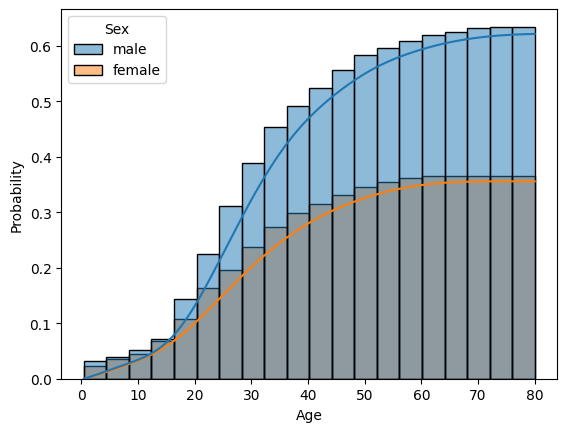

In [105]:
sns.histplot(x='Age',data=df,kde=True,stat='probability',hue='Sex',cumulative=True)

<Axes: xlabel='Age', ylabel='Probability'>

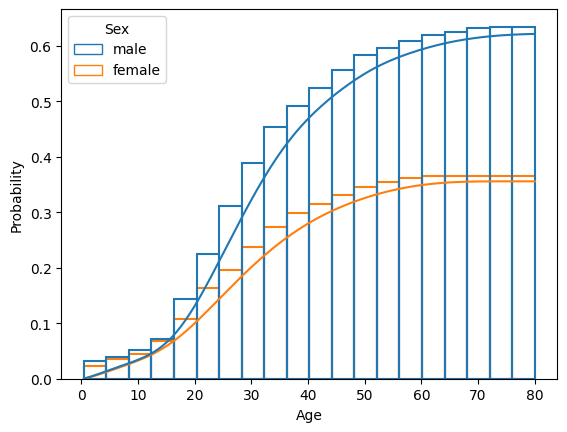

In [106]:
sns.histplot(x='Age',data=df,kde=True,stat='probability',hue='Sex',cumulative=True,fill=False)

##Grafico de Lineas

In [107]:
df2=pd.read_csv('https://raw.githubusercontent.com/lromeror/DataVisualization/main/Visualizaciones%20Univariables/tienda_ventas.csv',index_col='id')
df2.head(10)

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0
5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,2013-01-01,1,CELEBRATION,0.0,0
7,2013-01-01,1,CLEANING,0.0,0
8,2013-01-01,1,DAIRY,0.0,0


In [109]:
df2['mes']=df2['date'].apply(lambda x: x[:7])
df2.head()

,date,store_nbr,family,sales,onpromotion,mes
id,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013-01
1,2013-01-01,1,BABY CARE,0.0,0,2013-01
2,2013-01-01,1,BEAUTY,0.0,0,2013-01
3,2013-01-01,1,BEVERAGES,0.0,0,2013-01
4,2013-01-01,1,BOOKS,0.0,0,2013-01


In [117]:
bymes=df2.groupby('mes').agg({'sales':'sum'})
bymes

,sales
mes,
2013-01,1.032762e+07
2013-02,9.658960e+06
2013-03,1.142850e+07
2013-04,1.099346e+07
2013-05,1.159770e+07
2013-06,1.168934e+07
2013-07,1.125740e+07
2013-08,1.173779e+07
2013-09,1.179293e+07


<Axes: title={'center': 'Ventas por Mes'}, xlabel='mes'>

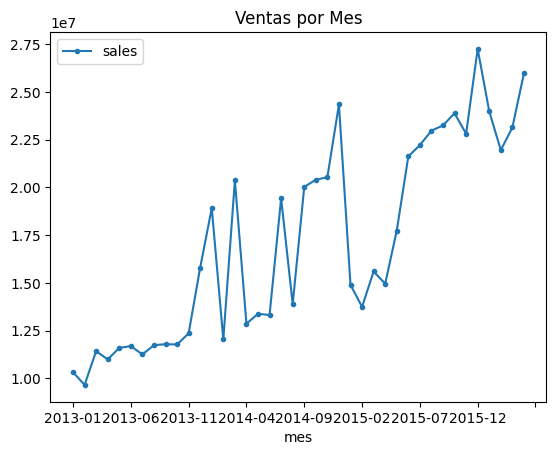

In [115]:
bymes.plot.line(title='Ventas por Mes',y='sales',style='.-')

In [118]:
px.line(bymes,y='sales',title='Ventas por Mes')